In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from lifestore_file import lifestore_products, lifestore_sales, lifestore_searches

In [3]:
#Se convierten a DataFrame las listas

pd_products = pd.DataFrame(lifestore_products, columns=['id_product', 'name', 'price', 'category', 'stock'])

pd_searches = pd.DataFrame(lifestore_searches, columns=['id_search', 'id product'])

pd_sales = pd.DataFrame(lifestore_sales, columns =['id_sale', 'id_product', 'score', 'date', 'refund'])
#score (from 1 to 5)
#refund (1 for true or 0 to false)

In [4]:
#El total de productos diferentes vendidos es
prod_vendidos = len(set(pd_sales['id_product']))
print(f'Total de productos vendidos = {prod_vendidos}')

Total de productos vendidos = 42


In [5]:
#Se hará un diccionario donde, para cada producto, identificado por su ID, se agregarán los puntajes dados, 
#el número de reseñas y el promedio de reseñas
dic_score = {}

#Se hará un registro para cada ID
for idx in pd_products['id_product']:
    #Se obtienen la información de cada producto
    id_info = pd_sales[pd_sales['id_product']==idx]
    #Nos quedamos sólo con los score
    scores = id_info['score']
    #Valores a guardar
    name = pd_products.iloc[idx-1, 1]
    vec_scores = scores.tolist()
    no_scores = len(scores)
    val_scores = np.mean(scores)
    dic_score[idx] = {'Nombre':name, 'Reseñas':vec_scores, 'Total de reseñas':no_scores, 'Puntaje':val_scores}

In [6]:
#Se convierte el diccionario en dataframe donde cada ID de producto será una fila
df_score = pd.DataFrame.from_dict(dic_score, orient='index')

In [7]:
#Se ordena el DataFrame con respecto a la media de reseñas con orden descendente
df_sorted_media = df_score.sort_values(by=['Puntaje', 'Total de reseñas'], ascending=False)

In [8]:
#Se muestran los 5 productos vendidos mejor evaluados
print("\033[1m" + '\nProductos con las mejores reseñas:' + "\033[0m")
df_sorted_media.head()


Productos con las mejores reseñas:


,Nombre,Reseñas,Total de reseñas,Puntaje
7,"Procesador Intel Core i7-9700K, S-1151, 3.60GH...","[5, 5, 5, 5, 5, 5, 5]",7,5.0
8,"Procesador Intel Core i5-9600K, S-1151, 3.70GH...","[5, 5, 5, 5]",4,5.0
6,"Procesador Intel Core i9-9900K, S-1151, 3.60GH...","[5, 5, 5]",3,5.0
11,"Tarjeta de Video ASUS AMD Radeon RX 570, 4GB 2...","[5, 5, 5]",3,5.0
49,"Kit SSD Kingston KC600, 1TB, SATA III, 2.5, 7mm","[5, 5, 5]",3,5.0


In [9]:
#Se muestran los 5 productos vendidos peor evaluados
print("\033[1m" + '\nProductos con las peores reseñas:' + "\033[0m")
df_sorted_media[df_sorted_media['Total de reseñas']>0].tail()


Productos con las peores reseñas:


,Nombre,Reseñas,Total de reseñas,Puntaje
89,"Cougar Audífonos Gamer Phontum Essential, Alám...",[3],1,3.000000
46,"Tarjeta Madre Gigabyte micro ATX GA-H110M-DS2,...",[2],1,2.000000
31,Tarjeta Madre AORUS micro ATX B450 AORUS M (re...,"[1, 1, 1, 4, 3, 1]",6,1.833333
17,Tarjeta de Video Gigabyte AMD Radeon R7 370 OC...,[1],1,1.000000
45,"Tarjeta Madre ASRock ATX H110 Pro BTC+, S-1151...",[1],1,1.000000


In [10]:
Noproductos = 5

print("\033[1m" + 'Productos con las mejores reseñas:' + "\033[0m")
print('ID\tPuntaje\tNombre')
for i in range(Noproductos):
    id_val = df_sorted_media.index[i]
    name_val = df_sorted_media.iloc[i, 0] #pd_products.iloc[id_val, 1]
    score_val = df_sorted_media.iloc[i, 3]
    print(f'{id_val}\t{score_val}\t{name_val}')

Productos con las mejores reseñas:
ID	Puntaje	Nombre
7	5.0	Procesador Intel Core i7-9700K, S-1151, 3.60GHz, 8-Core, 12MB Smart Cache (9na. Generación Coffee Lake)
8	5.0	Procesador Intel Core i5-9600K, S-1151, 3.70GHz, Six-Core, 9MB Smart Cache (9na. Generiación - Coffee Lake)
6	5.0	Procesador Intel Core i9-9900K, S-1151, 3.60GHz, 8-Core, 16MB Smart Cache (9na. Generación Coffee Lake)
11	5.0	Tarjeta de Video ASUS AMD Radeon RX 570, 4GB 256-bit GDDR5, PCI Express 3.0
49	5.0	Kit SSD Kingston KC600, 1TB, SATA III, 2.5, 7mm


In [11]:
Noproductos = 5

print("\033[1m" + 'Productos con las peores reseñas:' + "\033[0m")
print('ID\tPuntaje\tNombre')
for i in range(Noproductos):
    id_val = df_sorted_media[df_sorted_media['Total de reseñas']>0].index[-1-i]
    name_val = df_sorted_media[df_sorted_media['Total de reseñas']>0].iloc[-1-i, 0]
    score_val = df_sorted_media[df_sorted_media['Total de reseñas']>0].iloc[-1-i, 3]
    print(f'{id_val}\t{round(score_val, 1)}\t{name_val}')

Productos con las peores reseñas:
ID	Puntaje	Nombre
45	1.0	Tarjeta Madre ASRock ATX H110 Pro BTC+, S-1151, Intel H110, 32GB DDR4, para Intel
17	1.0	Tarjeta de Video Gigabyte AMD Radeon R7 370 OC, 2GB 256-bit GDDR5, PCI Express 3.0
31	1.8	Tarjeta Madre AORUS micro ATX B450 AORUS M (rev. 1.0), S-AM4, AMD B450, HDMI, 64GB DDR4 para AMD
46	2.0	Tarjeta Madre Gigabyte micro ATX GA-H110M-DS2, S-1151, Intel H110, 32GB DDR4 para Intel
89	3.0	Cougar Audífonos Gamer Phontum Essential, Alámbrico, 1.9 Metros, 3.5mm, Negro.


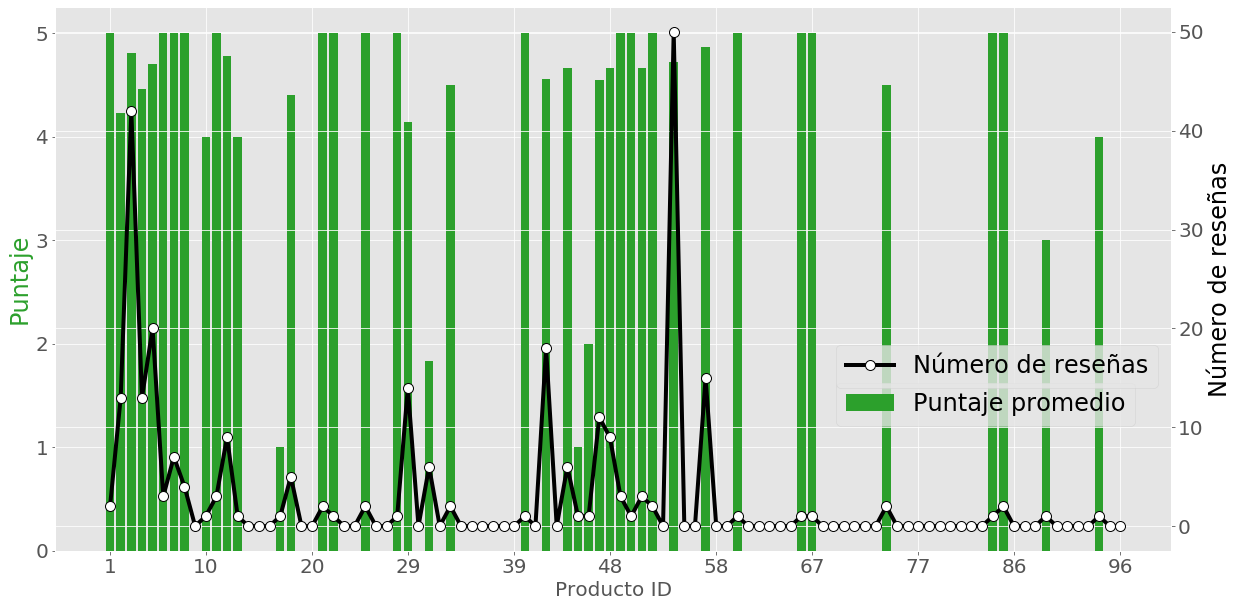

In [12]:
##############################################################
################# Se grafican las reseñas ## #################
##############################################################

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
#plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:green'
x = [i+1 for i in range(len(pd_products))]
ax1.bar(x, df_score['Puntaje'], color=color, linewidth=3, label='Puntaje promedio')
ax1.set_xlabel('Producto ID', fontsize=20)
ax1.set_ylabel('Puntaje', fontsize=24, color=color)
# ax1.set_xlim(-4, 100)
# ax1.set_ylim(0, 1005)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc=[.7, .23], fontsize=24)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

x = [i+1 for i in range(len(pd_products))]
ax2.plot(x, df_score['Total de reseñas'], '-o', color='black', mfc='white', linewidth=4, markersize=10, label='Número de reseñas')
# sum_scores = [sum(scores) for scores in df_score['reseñas']]
# ax2.plot(x, sum_scores, '-o', color='black', mfc='white', markersize=10, label='Ventas netas')
ax2.set_xlabel('Producto ID', fontsize=20)
ax2.set_ylabel('Número de reseñas', fontsize=24, color='black')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


nsticks=10
x = np.array([int((len(pd_products)-1)/nsticks*i+1) for i in range(nsticks+1)])
my_xticks = [i for i in x]
plt.xticks(x, my_xticks)
#plt.gcf().autofmt_xdate()

plt.legend(loc=[.7, .3], fontsize=24)